In [1]:
%matplotlib inline

import csv

import colour
import numpy as np
from colour.plotting import *

import matplotlib.colors as mc 
from matplotlib import pyplot as plt

In [2]:
def ingest(filename, color):
    filepath = "data/" + filename
    points_list = []
    with open(filepath, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            points_list.append(np.array(row, dtype=float))

    RGB_list = []
    color_list = []
    for point in points_list:
    #     RGB_list.append(colour.models.eotf_inverse_sRGB(point / 255))
        RGB_list.append(point)
        color_list.append(color)
        
    return RGB_list, color_list                                

In [3]:
points = ingest('Carpet.csv', 'w')[0] 
colors = ingest('Carpet.csv', 'w')[1]

points += ingest('Track.csv', 'k')[0] # V < 100. 
colors += ingest('Track.csv', 'k')[1]

points += ingest('Red.csv', 'r')[0]  # Bright Red
colors += ingest('Red.csv', 'r')[1]

points += ingest('DarkGreen.csv', 'g')[0] # Dark Green
colors += ingest('DarkGreen.csv', 'g')[1]

points += ingest('DarkerBlue.csv', 'b')[0]   # Dark Azur
colors += ingest('DarkerBlue.csv', 'b')[1]
points += ingest('LighterBlue.csv', 'b')[0]  # Medium Azur
colors += ingest('LighterBlue.csv', 'b')[1]

points += ingest('DarkerYellow.csv', 'y')[0] # Vibrant Yellow: brightest reflected intensity, but reads as bluish  
colors += ingest('DarkerYellow.csv', 'y')[1]
points += ingest('LighterYellow.csv', 'y')[0] # Bright Yellow
colors += ingest('LighterYellow.csv', 'y')[1]

points += ingest('DarkPurple.csv', 'm')[0]  # Bright Redish Violet
colors += ingest('DarkPurple.csv', 'm')[1]
points += ingest('LightPurple.csv', 'm')[0] # Light Purple
colors += ingest('LightPurple.csv', 'm')[1]

points = [x/256. for x in points]

/Users/busko/.local/lib/python3.10/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: The "ALEXA Wide Gamut" RGB colourspace has been renamed to "ARRI Wide Gamut 3" for consistency with ARRI's new naming convention.
  warn(*args, **kwargs)
/Users/busko/.local/lib/python3.10/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: The "CIE 2012 2 Degree Standard Observer" has been renamed to "CIE 2015 2 Degree Standard Observer" for consistency with the official CIE name which was adopted in 2015.
  warn(*args, **kwargs)
/Users/busko/.local/lib/python3.10/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: The "CIE 2012 10 Degree Standard Observer" has been renamed to "CIE 2015 10 Degree Standard Observer" for consistency with the official CIE name which was adopted in 2015.
  warn(*args, **kwargs)


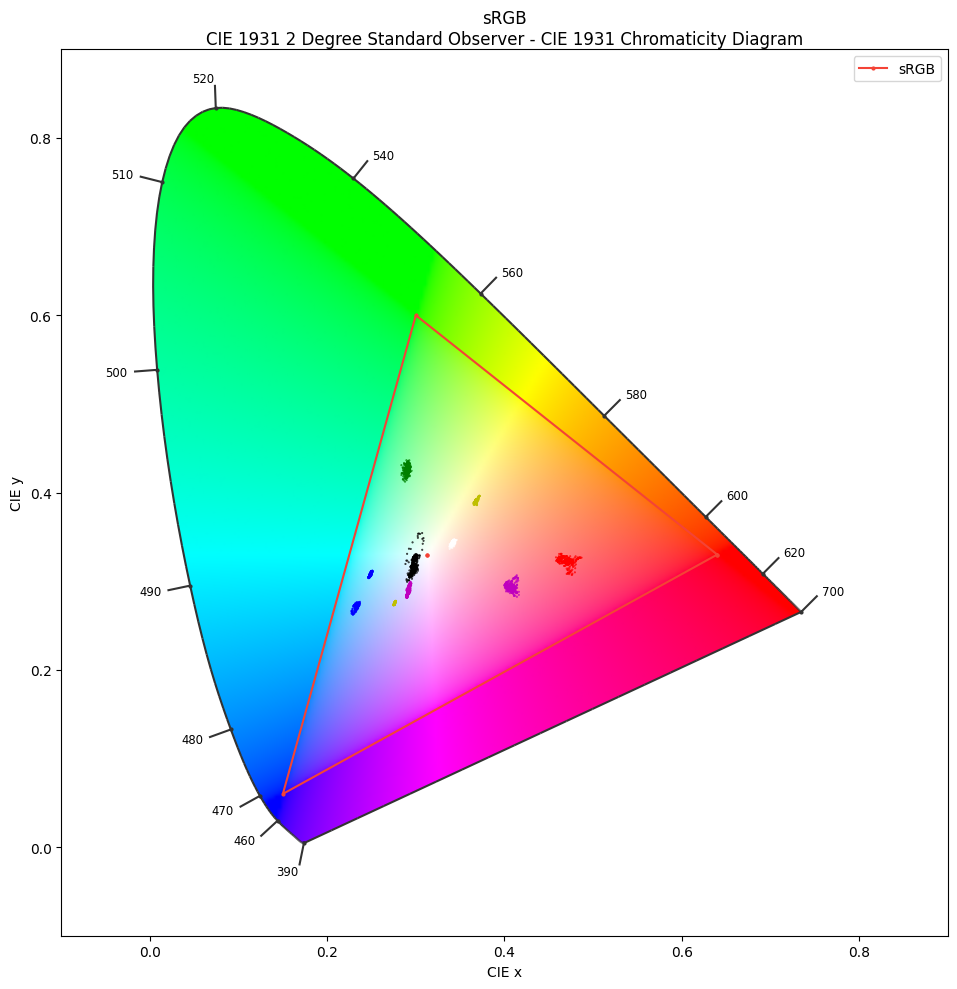

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'sRGB\nCIE 1931 2 Degree Standard Observer - CIE 1931 Chromaticity Diagram'}, xlabel='CIE x', ylabel='CIE y'>)

In [4]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["lines.markersize"] = 2.
plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(points, scatter_kwargs={"c": colors, 'marker':'.', 's':1})

### Conclusions:
 - the two kinds of blue are easily told apart by just the hue
 - track is very dark and can be discriminated against by using V > 100.
 - carpet can easily be discriminated against by its low saturation
 - "darker yellow" is in fact a kind of blue. But can be useful nevertheless
 - light purple doesn't look very useful because overlaps with the track
